# Term Deposit Sale
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.


In [1]:
#import key libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
!pip install yellowbrick

In [3]:
from yellowbrick.classifier import ClassificationReport, ROCAUC


In [4]:
df = pd.read_csv('bank-full.csv')

# Deliverable – 1 - 1. Univariate analysis

a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.


In [5]:
#print first 10 records of data

df.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
#Serveral missing values in the job column, education column, contact column and outcome of the previous marketing campaign

# Attribute information
Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. balance in account
7. housing: has housing loan?
8. loan: has personal loan?

Related to previous contact:
9. contact: contact communication type
10. day: last contact day of the month
11. month: last contact month of year
12. duration: last contact duration, in seconds*
Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign

Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [7]:
df.shape

(45211, 17)

In [8]:
#check data type in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
 # many columns are of type object i.e. strings. These need to be converted to ordinal type

In [10]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [12]:
#are there any NULL values in the data
df.isnull().values.any()

False

In [13]:
#statistical summary of data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


In [14]:
#Number of unique in each column?
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [15]:
#Understanding the value counts of the categorical variables
print(df.job.value_counts())
print(" ")
print(df.marital.value_counts())
print(" ")
print(df.education.value_counts())
print(" ")
print(df.default.value_counts())
print(" ")
print(df.housing.value_counts())
print(" ")
print(df.contact.value_counts())
print(" ")
print(df.poutcome.value_counts())
print(" ")
print(df.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
 
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
 
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
 
no     44396
yes      815
Name: default, dtype: int64
 
yes    25130
no     20081
Name: housing, dtype: int64
 
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
 
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
 
no     39922
yes     5289
Name: Target, dtype: int64


In [16]:
df[df.eq('unknown').any(1)]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


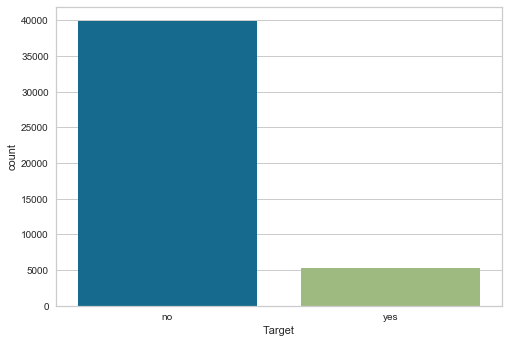

In [17]:
sns.countplot(df['Target'])

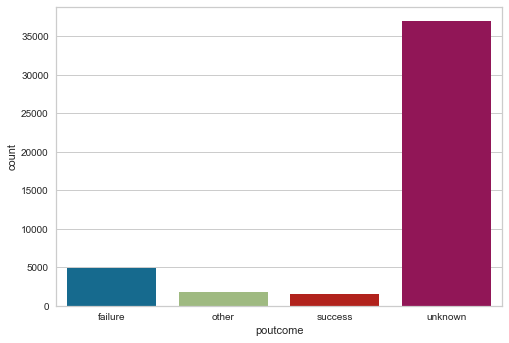

In [18]:
sns.countplot(df['poutcome'])

In [19]:
#for the data provided for target variable a very large number of records (36959 out of 45211) are unknown. 
#Similarly there is 'Other' in the outcome, which does not give us the desired results.

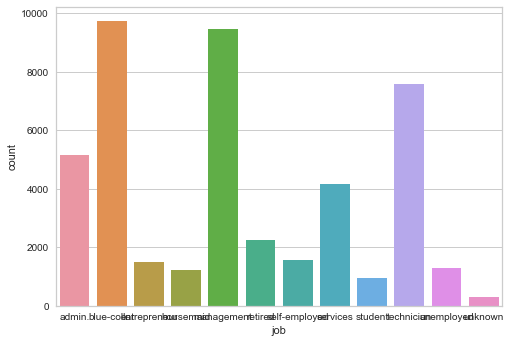

In [20]:
sns.countplot(df['job'])

In [21]:
#Value counts of all categorical columns.
df.groupby('job').nunique()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
job,,,,,,,,,,,,,,,,,
admin.,50,1,3,4,2,2179,2,2,3,31,12,855,33,335,25,4,2
blue-collar,50,1,3,4,2,3263,2,2,3,31,12,1098,37,326,30,4,2
entrepreneur,48,1,3,4,2,914,2,2,3,31,12,570,23,143,15,4,2
housemaid,55,1,3,4,2,771,2,2,3,31,12,514,21,110,15,4,2
management,58,1,3,4,2,3514,2,2,3,31,12,1060,39,419,32,4,2
retired,66,1,3,4,2,1314,2,2,3,31,12,715,22,204,18,4,2
self-employed,49,1,3,4,2,982,2,2,3,31,12,601,28,165,18,4,2
services,43,1,3,4,2,1894,2,2,3,31,12,822,30,267,20,4,2
student,30,1,3,4,2,565,2,2,3,31,12,442,18,146,18,4,2


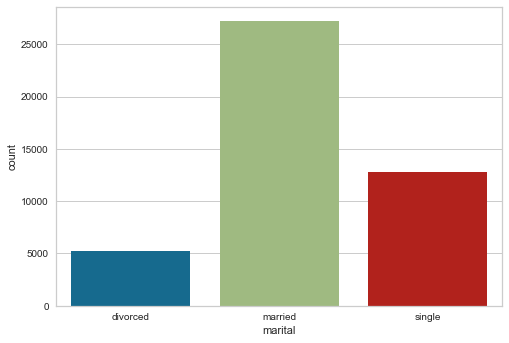

In [22]:
sns.countplot(df['marital'])

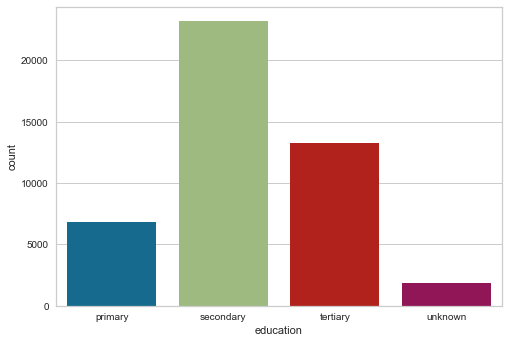

In [23]:
sns.countplot(df['education'])

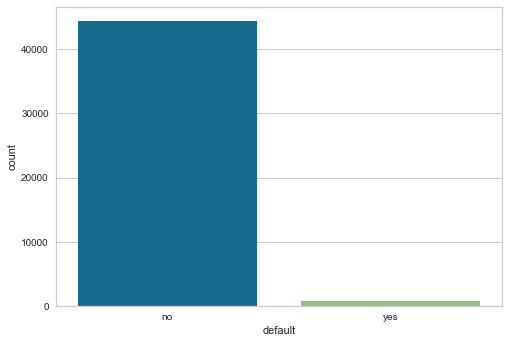

In [24]:
sns.countplot(df['default'])

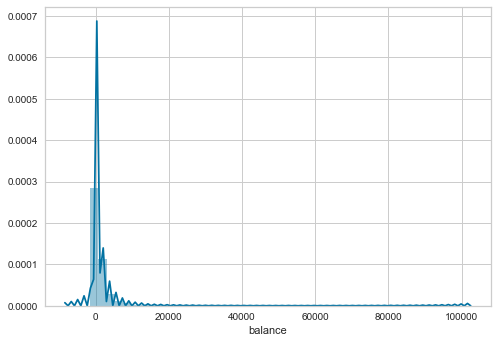

In [25]:
sns.distplot(df['balance'])

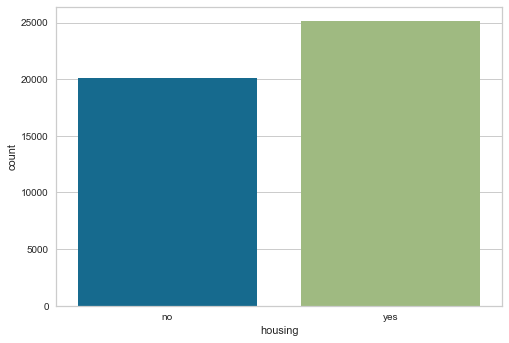

In [26]:
sns.countplot(df['housing'])

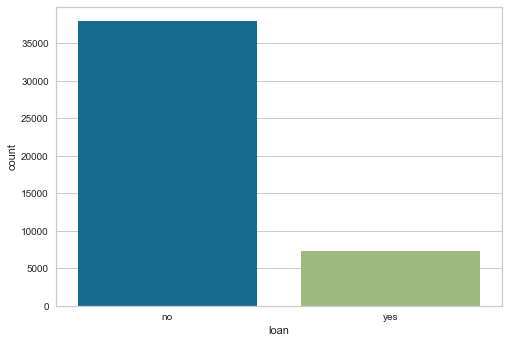

In [27]:
sns.countplot(df['loan'])

In [28]:
#statistical summary of data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


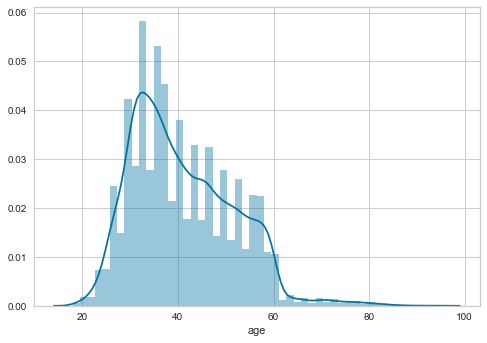

In [29]:
sns.distplot(df['age'])

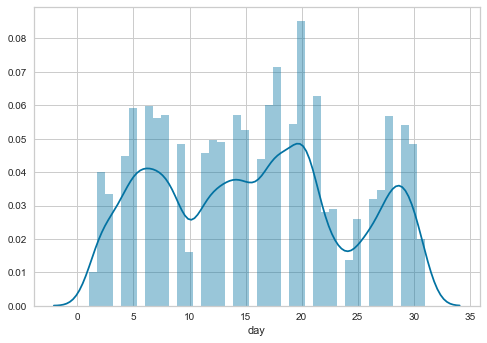

In [30]:
sns.distplot(df['day'])

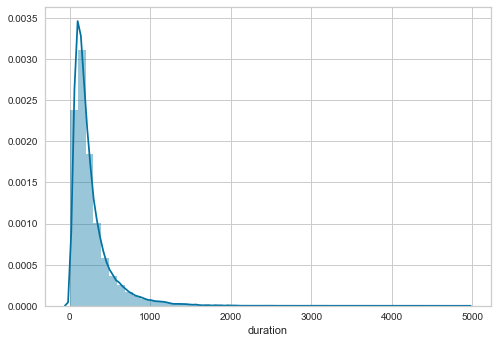

In [31]:
sns.distplot(df['duration'])

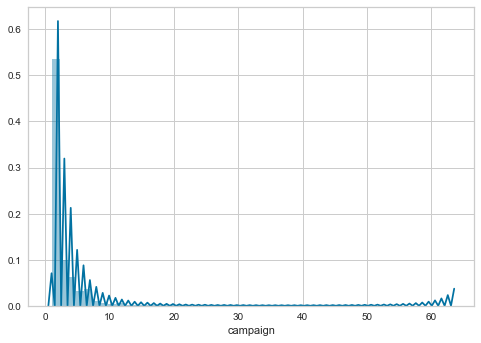

In [32]:
sns.distplot(df['campaign'])

In [33]:
#Strategies to address the data pollution
# The main challenge was the data without any result in the target variable, that has been removed to only keep the data where we have the required information.
# The other problem is the unknowen values in the following: Education & Job: It should be replaced with mode
# There is an outlier in the balance data where the balance is 81,204, significantly higher than the mean of 1,577 and that should be removed
# Tough some skewness exists in other variables it can be handled through normalization.

In [34]:
df.shape

(45211, 17)

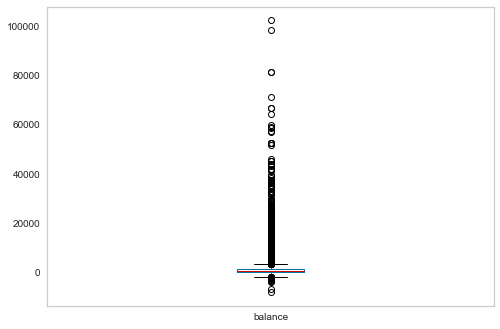

In [35]:
df.boxplot(column=['balance'], 
                       grid=False)

In [36]:
df=df[df.balance < 2000]

In [37]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
10,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no


In [38]:
df=df[df.balance > -1000]

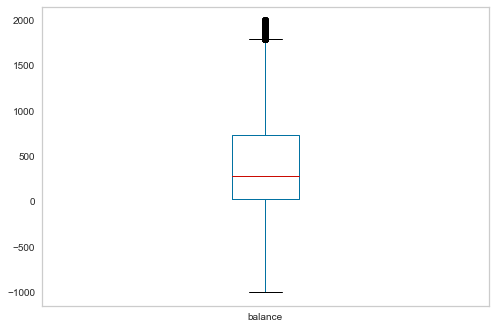

In [39]:
df.boxplot(column=['balance'], 
                       grid=False)

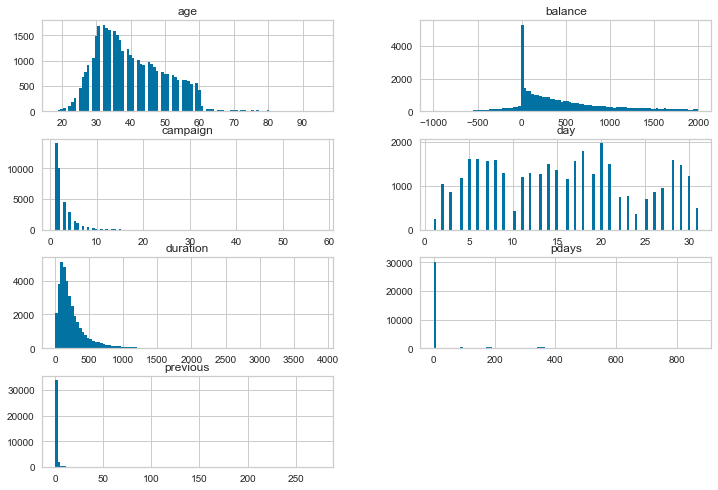

In [40]:
columns = list(df)
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [41]:
#There is a significant data skewness challenge that will need to be addressed. 
#In some cases the balance appears to be negative, which could be due to overdraft on the accounts. 
# Customers are quite evenly ditributed by age, most customers are married, secondary educated and there is a very little default rate.
# Most customers have housing loan but very small percentage of customers have taken personal loan.
# Average bank balance of the customers is 1,577.39.

# Deliverable – 1 - 2. Multivariate analysis
a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

In [42]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.06,-0.00,-0.01,0.01,-0.03,-0.01
balance,0.06,1.00,-0.01,0.03,-0.03,0.04,0.04
day,-0.00,-0.01,1.00,-0.03,0.17,-0.10,-0.06
duration,-0.01,0.03,-0.03,1.00,-0.08,-0.01,-0.00
campaign,0.01,-0.03,0.17,-0.08,1.00,-0.09,-0.03
pdays,-0.03,0.04,-0.10,-0.01,-0.09,1.00,0.44
previous,-0.01,0.04,-0.06,-0.00,-0.03,0.44,1.00


In [52]:
sns.pairplot(df, diag_kind='kde')
plt.show()

KeyboardInterrupt: 

In [43]:
oneHotCols=["marital","contact","job"]


In [44]:
df=pd.get_dummies(df, columns=oneHotCols)

In [45]:
#poutcome has large values of unknown data and should be dropped

df.drop('poutcome',axis=1,inplace=True)

In [46]:
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
1,44,secondary,no,29,yes,no,5,may,151,1,...,0,0,0,0,0,0,0,1,0,0
2,33,secondary,no,2,yes,yes,5,may,76,1,...,1,0,0,0,0,0,0,0,0,0
3,47,unknown,no,1506,yes,no,5,may,92,1,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,no,1,no,no,5,may,198,1,...,0,0,0,0,0,0,0,0,0,1
5,35,tertiary,no,231,yes,no,5,may,139,1,...,0,0,1,0,0,0,0,0,0,0


In [47]:
replaceStruct = {
                "default":     {"no": 0, "yes": 1 },
                    "loan":     {"no": 0, "yes": 1 },
                "housing":     {"no": 0, "yes": 1 },
                 "Target":     {"no": 0, "yes": 1 },
                 "poutcome":     {"failure": 0, "success": 1 },    
               "education":     {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1},
                "month": {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5,"jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12},}

In [48]:
df=df.replace(replaceStruct)

In [49]:
pd.set_option('display.max_columns', None)

df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
1,44,2,0,29,1,0,5,5,151,1,-1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,33,2,0,2,1,1,5,5,76,1,-1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,47,-1,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,33,-1,0,1,0,0,5,5,198,1,-1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,35,3,0,231,1,0,5,5,139,1,-1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [50]:
df.corr()

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
age,1.00,-0.16,-0.01,0.06,-0.17,-0.01,-0.00,0.09,-0.01,0.01,-0.03,-0.01,0.00,0.17,0.28,-0.42,-0.06,0.15,-0.01,-0.06,-0.04,0.02,0.09,-0.02,0.42,-0.01,-0.06,-0.20,-0.06,0.00,0.05
education,-0.16,1.00,-0.01,0.03,-0.03,0.02,0.02,0.06,0.00,0.00,0.00,0.02,0.04,0.01,-0.11,0.12,0.15,-0.07,-0.12,-0.01,-0.31,0.04,-0.09,0.39,-0.09,0.07,-0.05,-0.05,0.07,-0.01,-0.12
default,-0.01,-0.01,1.00,-0.14,-0.02,0.07,0.01,0.02,-0.01,0.02,-0.03,-0.02,-0.02,0.02,-0.02,0.00,-0.01,-0.02,0.02,-0.01,0.01,0.03,-0.00,-0.00,-0.01,0.00,-0.00,-0.02,-0.01,0.01,-0.01
balance,0.06,0.03,-0.14,1.00,-0.04,-0.09,-0.01,0.02,0.03,-0.03,0.04,0.04,0.07,-0.04,0.02,0.01,0.02,0.04,-0.04,-0.01,-0.03,-0.01,-0.00,0.03,0.04,0.01,-0.03,0.02,-0.01,0.02,0.02
housing,-0.17,-0.03,-0.02,-0.04,1.00,0.02,-0.05,-0.19,0.01,-0.03,0.14,0.05,-0.12,0.00,0.02,-0.03,-0.17,-0.07,0.21,0.04,0.18,0.01,-0.08,-0.07,-0.14,-0.02,0.06,-0.09,-0.02,-0.05,-0.07
loan,-0.01,0.02,0.07,-0.09,0.02,1.00,0.01,0.04,-0.01,0.01,-0.02,-0.01,-0.06,0.02,0.04,-0.05,0.02,-0.01,-0.01,0.03,0.02,0.04,-0.01,-0.04,-0.01,-0.01,0.03,-0.06,0.01,-0.04,-0.03
day,-0.00,0.02,0.01,-0.01,-0.05,0.01,1.00,0.10,-0.03,0.17,-0.10,-0.06,-0.03,-0.00,0.01,-0.01,0.03,0.02,-0.04,-0.01,-0.03,0.00,0.01,0.02,-0.01,0.00,-0.01,-0.02,0.03,-0.00,-0.01
month,0.09,0.06,0.02,0.02,-0.19,0.04,0.10,1.00,-0.02,0.07,-0.13,-0.05,0.02,0.00,0.06,-0.07,0.14,0.04,-0.16,-0.04,-0.09,0.02,0.04,0.08,0.03,0.02,-0.04,-0.01,0.04,-0.04,0.01
duration,-0.01,0.00,-0.01,0.03,0.01,-0.01,-0.03,-0.02,1.00,-0.08,-0.01,-0.00,0.40,0.01,-0.02,0.02,0.02,-0.03,-0.01,-0.02,0.01,0.00,-0.01,-0.01,0.02,0.01,0.00,-0.01,-0.01,0.02,-0.00
campaign,0.01,0.00,0.02,-0.03,-0.03,0.01,0.17,0.07,-0.08,1.00,-0.09,-0.03,-0.07,-0.02,0.04,-0.03,-0.03,0.06,-0.00,-0.02,0.01,0.00,0.00,0.02,-0.03,0.01,-0.00,-0.02,0.02,-0.01,0.01


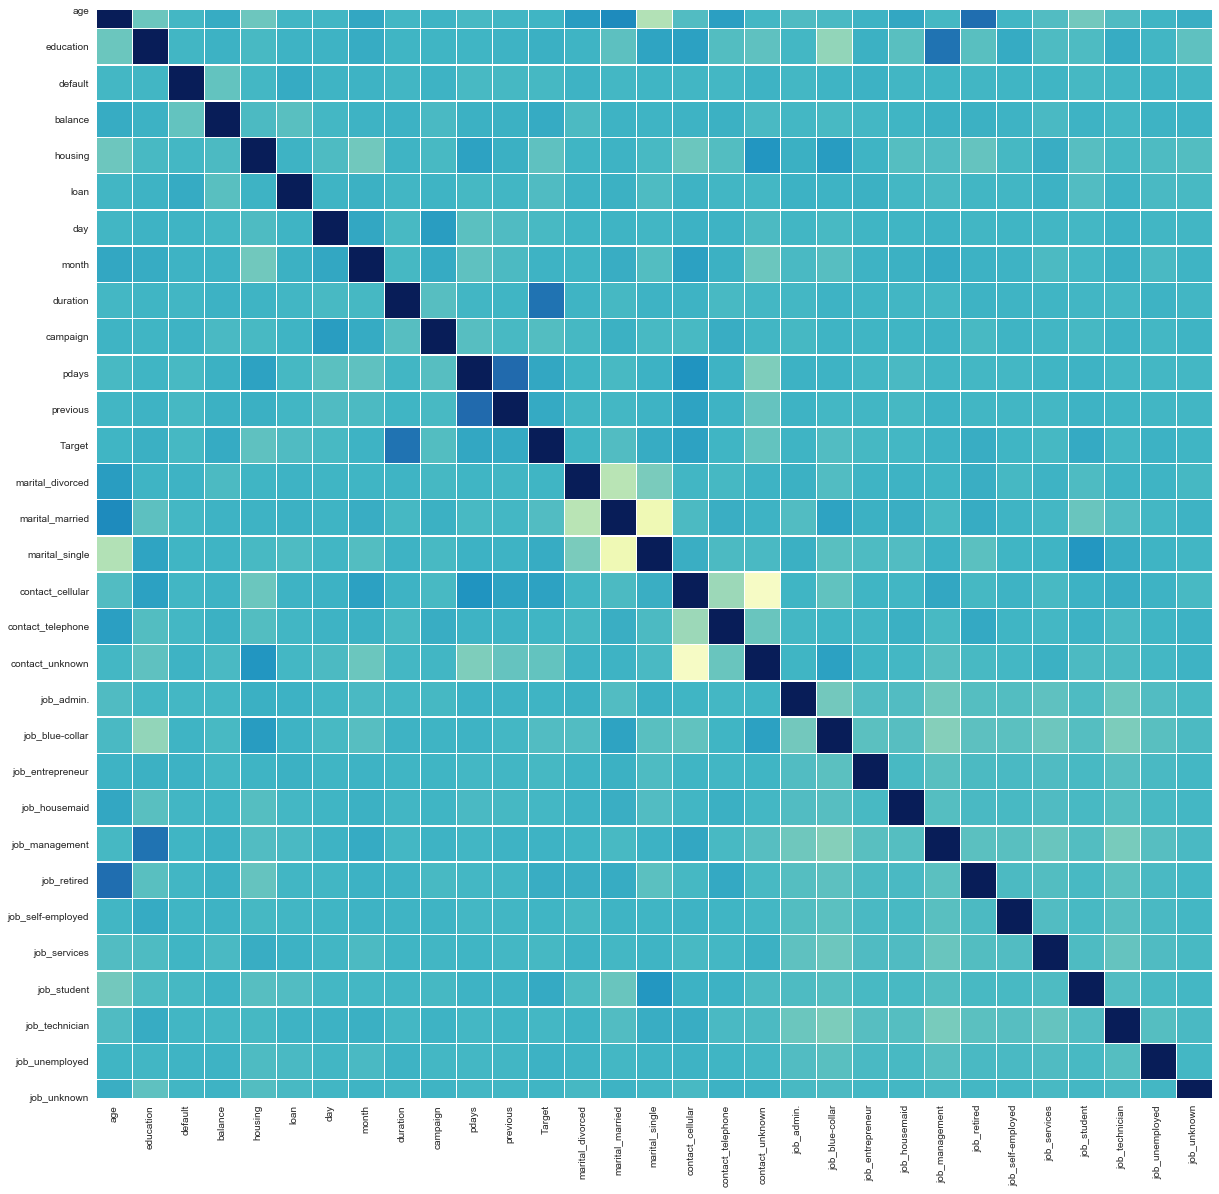

In [51]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(),
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [53]:
#Looking at the bivariate analysis above, it is difficult to draw a conclusion as to which variables have a strong correlation with the desire target and further analysis is required.

# Deliverable – 2 Prepare the data for analytics
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [54]:
#The above steps involved getting the data ready for modeling including transforming the data by replacing the categorical variables and using onehot encoding.
#also fixed the attribute types

In [55]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

features = [col for col in df.columns if col != 'Target']

X_train, X_test, y_train, y_test = train_test_split(df[features], df['Target'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

((25592, 30), (10969, 30))

# Deliverable – 3 - 1. First create models using Logistic Regression and Decision Tree algorithm. 
Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model.


In [56]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. 

model_entropy = DecisionTreeClassifier(criterion='entropy')

In [57]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.89


In [60]:
# There is a high degree of overfitting in the model due to which the test accuracy drops . 
# Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.


In [83]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.90
Test: 0.90


In [85]:
# there is a minor improvment in the test result but overall the results appear more balances between trian and test

In [86]:
# Assess the accuracy score
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)
acc_DT

0.8979852311058437

In [87]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,9656,183
1,936,194


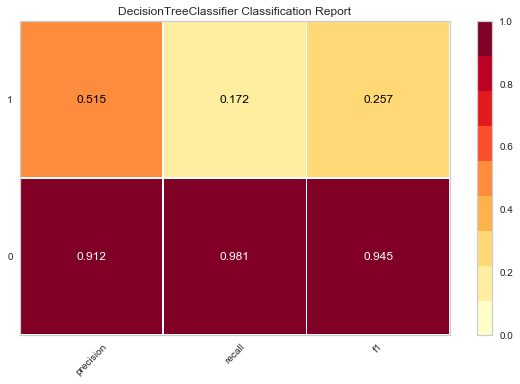

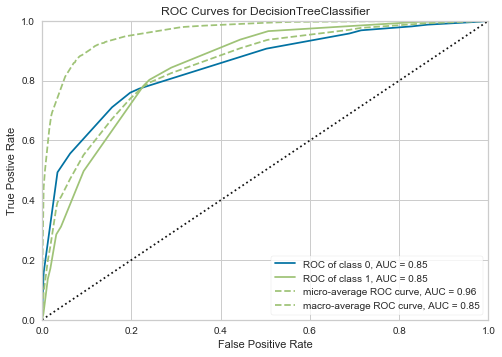

In [88]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [ ]:
# This outcome shows that the model has high level of results scope for predicted failed targets but scores poorly on the win rate.

In [95]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90


# Deliverable – 3 - 2 Build the ensemble models (Bagging and Boosting) 
Note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms)


In [89]:
#Apply Adaboost Ensemble Algorithm for the same

In [90]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [91]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
acc_AB

0.8994438873188075

In [92]:
pred_AB_train = abcl.predict(X_train)
acc_AB_train = accuracy_score(y_train, pred_AB_train)
acc_AB_train

0.8989527977492967

In [93]:
#comparing the boosting with adaboost the accuracy remains nearly the same.


In [96]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Adaboost,0.90


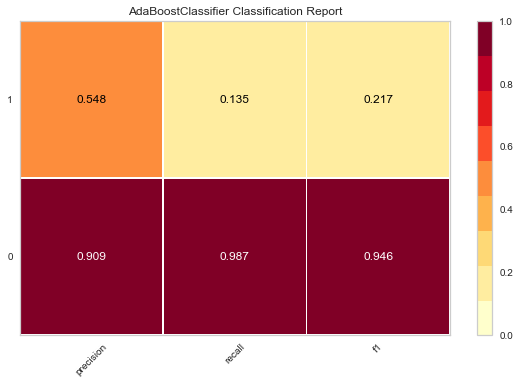

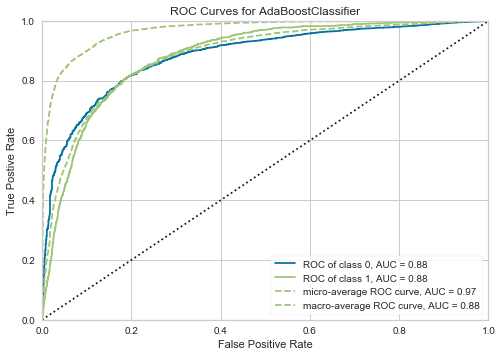

In [97]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [98]:
#looking ath the adaboost results, there is little difference with the decision tree results

In [99]:
#Apply Bagging Classifier Algorithm

In [104]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=model_entropy, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [105]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
acc_BG

0.9053696781839731

In [107]:
pred_BG_train = bgcl.predict(X_train)
acc_BG_train = accuracy_score(y_train, pred_BG_train)
acc_BG_train

0.9996874023132228

In [108]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Adaboost,0.90
0,Bagging,0.91


In [110]:
import warnings

In [111]:
warnings.filterwarnings("ignore")

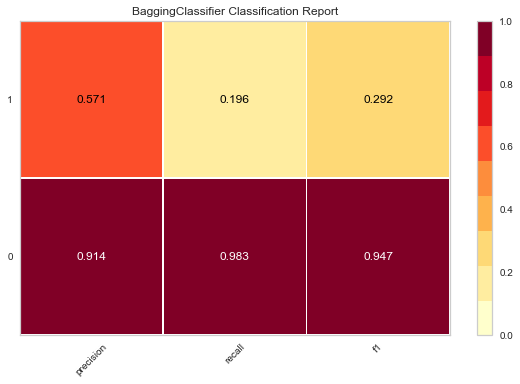

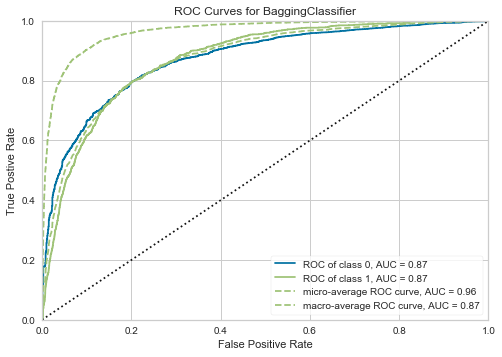

In [112]:
# Visualize model performance with yellowbrick library
bgcl = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=50, 
                         max_samples= .8, bootstrap=False, oob_score=False, random_state=22)

viz = ClassificationReport(BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=50, 
                         max_samples= .8, bootstrap=False, oob_score=False, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=50, 
                         max_samples= .8, bootstrap=False, oob_score=False, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [ ]:
#It appears the bagging classifier results are marginally better.

# Deliverable – 3 - 3 Make a DataFrame to compare models and their metrics. 
Give conclusion regarding the best algorithm and your reason behind it. 



In [113]:
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Adaboost,0.90
0,Bagging,0.91


In [114]:
# having compared the results from three algorithems, the results appear very similar. 
#The results can be enhanced using parameter turning and other techniques but essentially, it appears any of the models can be used for deploment.